In [1]:
import pandas as pd
from tqdm import tqdm

# 전처리

In [2]:
df_news = pd.read_csv('./data/news_2016.csv')

df_news

,title,content
0,野 텃밭 호남서 더민주·安신당 '엎치락 뒤치락',"SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연합..."
1,차기 대선주자 선호도 1위 반기문…방송사 신년 여론조사,KBS 당선 가능성 조사에선 김무성-반기문-문재인-박원순-안철수 順새누리 37.4%...
2,"'정의화 획정안', 직권상정돼도 與野 반대로 부결 가능성↑",[CBS노컷뉴스 장성주 기자]\n\n\n\n정의화 국회의장 (사진=윤성호 기자/자료...
3,"새누리당 지지율 1위, 더민주·안철수 신당 경쟁",【서울=뉴시스】손정빈 기자 = 총선이 치러지는 병신년((丙申年) 새해 첫 정당 지지...
4,각종 언론사 여론조사서 '안철수 신당' 돌풍 예고,안철수 신당 여야 지지층 흡수 관련 분석은 각각 달라[CBS노컷뉴스 박초롱 기자]\...
...,...,...
72454,새누리당 '반성과 다짐의 달리기 릴레이',(서울=뉴스1) 박세연 기자 = 11일 자정이 지난 12일 새벽 권영세 새누리당 영...
72455,국회 앞 달리는 권영세 후보,(서울=뉴스1) 박세연 기자 = 11일 자정이 지난 12일 새벽 권영세 새누리당 영...
72456,“반문 정서? 반갑다 문재인” 가는 곳마다 지지자 대거 몰려,[아시아경제 조아라 인턴기자] 문재인 더불어민주당 전 대표의 4·13 총선을 앞둔 ...
72457,김종인 “제주 국민의당 후보는 더민주 방해역할… 신경 안 써”,김종인 더불어민주당 비상대책위 대표.[아시아경제 조아라 인턴기자] 김종인 더불어민주...


In [3]:
df_news[df_news['content'] == 'No content available']

,title,content
1236,DJ묘소 찾은 김한길,No content available
1361,논의하는 김무성-원유철,No content available
6617,"""누리과정 예산지원 촉구한다""",No content available
7716,최고위 모두발언하는 김무성 대표,No content available
8128,정대철 '야권 통합해 봅시다',No content available
...,...,...
65241,"D-8, 김무성-김종인 충청 대격돌…안철수, 경기북부 매진",No content available
66374,"정기철 후보, 용지초 공개수업 참관",No content available
68668,‘손학규 잡아라’ 더민주 지원설에 국민의당 “헛물…더민주 조급증”,No content available
69160,<총선 D-4> '접전' 울산 동·북구…막판 기 싸움 치열,No content available


## 필요없는 문자 제거

In [4]:
df_news = df_news[df_news['content'] != 'No content available']
df_news = df_news.drop_duplicates(subset = ['title'])
df_news = df_news.copy()
df_news

,title,content
0,野 텃밭 호남서 더민주·安신당 '엎치락 뒤치락',"SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연합..."
1,차기 대선주자 선호도 1위 반기문…방송사 신년 여론조사,KBS 당선 가능성 조사에선 김무성-반기문-문재인-박원순-안철수 順새누리 37.4%...
2,"'정의화 획정안', 직권상정돼도 與野 반대로 부결 가능성↑",[CBS노컷뉴스 장성주 기자]\n\n\n\n정의화 국회의장 (사진=윤성호 기자/자료...
3,"새누리당 지지율 1위, 더민주·안철수 신당 경쟁",【서울=뉴시스】손정빈 기자 = 총선이 치러지는 병신년((丙申年) 새해 첫 정당 지지...
4,각종 언론사 여론조사서 '안철수 신당' 돌풍 예고,안철수 신당 여야 지지층 흡수 관련 분석은 각각 달라[CBS노컷뉴스 박초롱 기자]\...
...,...,...
72453,"권영세 후보, 반성과 다짐의 달리기",(서울=뉴스1) 박세연 기자 = 11일 자정이 지난 12일 새벽 권영세 새누리당 영...
72454,새누리당 '반성과 다짐의 달리기 릴레이',(서울=뉴스1) 박세연 기자 = 11일 자정이 지난 12일 새벽 권영세 새누리당 영...
72456,“반문 정서? 반갑다 문재인” 가는 곳마다 지지자 대거 몰려,[아시아경제 조아라 인턴기자] 문재인 더불어민주당 전 대표의 4·13 총선을 앞둔 ...
72457,김종인 “제주 국민의당 후보는 더민주 방해역할… 신경 안 써”,김종인 더불어민주당 비상대책위 대표.[아시아경제 조아라 인턴기자] 김종인 더불어민주...


In [5]:
df_news['content'] = df_news['content'].str.replace('\n', ' ')
df_news['content'] = df_news['content'].str.replace('/', ' ')


df_news

,title,content
0,野 텃밭 호남서 더민주·安신당 '엎치락 뒤치락',"SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연합..."
1,차기 대선주자 선호도 1위 반기문…방송사 신년 여론조사,KBS 당선 가능성 조사에선 김무성-반기문-문재인-박원순-안철수 順새누리 37.4%...
2,"'정의화 획정안', 직권상정돼도 與野 반대로 부결 가능성↑",[CBS노컷뉴스 장성주 기자] 정의화 국회의장 (사진=윤성호 기자 자료사진)정...
3,"새누리당 지지율 1위, 더민주·안철수 신당 경쟁",【서울=뉴시스】손정빈 기자 = 총선이 치러지는 병신년((丙申年) 새해 첫 정당 지지...
4,각종 언론사 여론조사서 '안철수 신당' 돌풍 예고,안철수 신당 여야 지지층 흡수 관련 분석은 각각 달라[CBS노컷뉴스 박초롱 기자] ...
...,...,...
72453,"권영세 후보, 반성과 다짐의 달리기",(서울=뉴스1) 박세연 기자 = 11일 자정이 지난 12일 새벽 권영세 새누리당 영...
72454,새누리당 '반성과 다짐의 달리기 릴레이',(서울=뉴스1) 박세연 기자 = 11일 자정이 지난 12일 새벽 권영세 새누리당 영...
72456,“반문 정서? 반갑다 문재인” 가는 곳마다 지지자 대거 몰려,[아시아경제 조아라 인턴기자] 문재인 더불어민주당 전 대표의 4·13 총선을 앞둔 ...
72457,김종인 “제주 국민의당 후보는 더민주 방해역할… 신경 안 써”,김종인 더불어민주당 비상대책위 대표.[아시아경제 조아라 인턴기자] 김종인 더불어민주...


## 후보 이름을 당으로 변환

In [6]:
people_df = pd.read_csv('./data/news_2016_후보.csv')
people_df['party'] = people_df['party'].str.strip()
people_df

,name,party
0,강기윤,새누리당
1,강도석,무소속
2,강동원,무소속
3,강동호,새누리당
4,강드림,정의당
...,...,...
787,황정애,고용복지연금선진화연대
788,황진하,새누리당
789,황창화,더불어민주당
790,황춘자,새누리당


In [7]:
# 사전으로 만들기(key : 이름, value : 당)

name_party_dic = dict(zip(people_df['name'], people_df['party']))

name_party_dic

{'강기윤': '새누리당',
 '강도석': '무소속',
 '강동원': '무소속',
 '강동호': '새누리당',
 '강드림': '정의당',
 '강래구': '더불어민주당',
 '강상구': '정의당',
 '강새별': '민중연합당',
 '강선경': '정의당',
 '강선우': '더불어민주당',
 '강세창': '새누리당',
 '강승규': '무소속',
 '강신복': '국민의당',
 '강신성': '민주당',
 '강연재': '국민의당',
 '강영삼': '정의당',
 '강요식': '새누리당',
 '강운태': '무소속',
 '강원': '국민의당',
 '강은미': '정의당',
 '강주열': '무소속',
 '강지용': '새누리당',
 '강창규': '새누리당',
 '강형욱': '국민의당',
 '강희권': '더불어민주당',
 '고기담': '민중연합당',
 '고무열': '국민의당',
 '고연호': '국민의당',
 '고영석': '기독자유당',
 '고영인': '더불어민주당',
 '고영일': '기독자유당',
 '고인정': '더불어민주당',
 '곽선우': '국민의당',
 '곽태원': '국민의당',
 '구교현': '노동당',
 '구상찬': '새누리당',
 '구성모': '국민의당',
 '구성재': '무소속',
 '구자상': '녹색당',
 '구자호': '정의당',
 '구희승': '국민의당',
 '권문상': '더불어민주당',
 '권범재': '정의당',
 '권성중': '더불어민주당',
 '권순덕': '한나라당',
 '권영국': '무소속',
 '권영세': '새누리당',
 '권오진': '국민의당',
 '권용준': '새누리당',
 '권은희': '무소속',
 '권중건': '국민의당',
 '권태호': '무소속',
 '권태홍': '정의당',
 '권혁기': '더불어민주당',
 '권혁세': '새누리당',
 '금병찬': '새누리당',
 '길종성': '국민의당',
 '김경수': '더불어민주당',
 '김경호': '국민의당',
 '김광만': '국민의당',
 '김광종': '무소속',
 '김교흥': '더불어민주당',
 '김구':

In [9]:
df_news = df_news.dropna()
df_news

,title,content
0,野 텃밭 호남서 더민주·安신당 '엎치락 뒤치락',"SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연합..."
1,차기 대선주자 선호도 1위 반기문…방송사 신년 여론조사,KBS 당선 가능성 조사에선 김무성-반기문-문재인-박원순-안철수 順새누리 37.4%...
2,"'정의화 획정안', 직권상정돼도 與野 반대로 부결 가능성↑",[CBS노컷뉴스 장성주 기자] 정의화 국회의장 (사진=윤성호 기자 자료사진)정...
3,"새누리당 지지율 1위, 더민주·안철수 신당 경쟁",【서울=뉴시스】손정빈 기자 = 총선이 치러지는 병신년((丙申年) 새해 첫 정당 지지...
4,각종 언론사 여론조사서 '안철수 신당' 돌풍 예고,안철수 신당 여야 지지층 흡수 관련 분석은 각각 달라[CBS노컷뉴스 박초롱 기자] ...
...,...,...
72453,"권영세 후보, 반성과 다짐의 달리기",(서울=뉴스1) 박세연 기자 = 11일 자정이 지난 12일 새벽 권영세 새누리당 영...
72454,새누리당 '반성과 다짐의 달리기 릴레이',(서울=뉴스1) 박세연 기자 = 11일 자정이 지난 12일 새벽 권영세 새누리당 영...
72456,“반문 정서? 반갑다 문재인” 가는 곳마다 지지자 대거 몰려,[아시아경제 조아라 인턴기자] 문재인 더불어민주당 전 대표의 4·13 총선을 앞둔 ...
72457,김종인 “제주 국민의당 후보는 더민주 방해역할… 신경 안 써”,김종인 더불어민주당 비상대책위 대표.[아시아경제 조아라 인턴기자] 김종인 더불어민주...


In [10]:
# title 열의 각 값에 대해 사람 이름을 당의 이름으로 변경

for idx, row in tqdm(df_news.iterrows()):
    for name, party in name_party_dic.items():
        if name in row['title']:
            df_news.at[idx, 'title'] = row['title'].replace(name, party)
            
        elif name in row['content']:
            df_news.at[idx, 'content'] = row['content'].replace(name, party)

67970it [04:21, 260.18it/s]


## 문장으로 나누기

In [11]:
df_news['content'] = df_news['content'].str.split('.')

df_news

,title,content
0,野 텃밭 호남서 더민주·安신당 '엎치락 뒤치락',"[SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연..."
1,차기 대선주자 선호도 1위 반기문…방송사 신년 여론조사,"[KBS 당선 가능성 조사에선 김무성-반기문-문재인-박원순-안철수 順새누리 37, ..."
2,"'정의화 획정안', 직권상정돼도 與野 반대로 부결 가능성↑",[[CBS노컷뉴스 장성주 기자] 정의화 국회의장 (사진=윤성호 기자 자료사진)...
3,"새누리당 지지율 1위, 더민주·안철수 신당 경쟁",[【서울=뉴시스】손정빈 기자 = 총선이 치러지는 병신년((丙申年) 새해 첫 정당 지...
4,각종 언론사 여론조사서 '안철수 신당' 돌풍 예고,[안철수 신당 여야 지지층 흡수 관련 분석은 각각 달라[CBS노컷뉴스 박초롱 기자]...
...,...,...
72453,"새누리당 후보, 반성과 다짐의 달리기",[(서울=뉴스1) 박세연 기자 = 11일 자정이 지난 12일 새벽 권영세 새누리당 ...
72454,새누리당 '반성과 다짐의 달리기 릴레이',[(서울=뉴스1) 박세연 기자 = 11일 자정이 지난 12일 새벽 새누리당 새누리당...
72456,“반문 정서? 반갑다 문재인” 가는 곳마다 지지자 대거 몰려,[[아시아경제 조아라 인턴기자] 문재인 더불어민주당 전 대표의 4·13 총선을 앞둔...
72457,김종인 “제주 국민의당 후보는 더민주 방해역할… 신경 안 써”,"[김종인 더불어민주당 비상대책위 대표, [아시아경제 조아라 인턴기자] 김종인 더불어..."


## 당에 대한 문장 나누기

In [12]:
party_names = list(people_df['party'].unique())

party_names

['새누리당',
 '무소속',
 '정의당',
 '더불어민주당',
 '민중연합당',
 '국민의당',
 '민주당',
 '기독자유당',
 '노동당',
 '녹색당',
 '한나라당',
 '한국국민당',
 '친반통일당',
 '코리아',
 '통일한국당',
 '대한민국당',
 '공화당',
 '개혁국민신당',
 '친반평화통일당',
 '진리대한당',
 '복지국가당',
 '고용복지연금선진화연대',
 '불교당',
 '기독당',
 '친반통합',
 '일제·위안부·인권정당']

당에 관한 기사만

In [13]:
# 당에 관한 기사만

party_sentences = []
party_lst = []

for data in tqdm(df_news.iloc[:, 1]):
    res = []
    party_name = []
    for j in range(len(data)):
        for party in party_names:
            if party in data[j]:
                party_name.append(party)
                res.append(data[j])
        else:
            continue
    party_sentences.append(res)
    party_lst.append(party_name)

df_news['party_content'] = party_sentences
df_news['party_name'] = party_lst

100%|█████████████████████████████████████████████████████████████████████████| 67970/67970 [00:05<00:00, 13546.38it/s]


In [14]:
df_news

,title,content,party_content,party_name
0,野 텃밭 호남서 더민주·安신당 '엎치락 뒤치락',"[SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연...","[SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연...","[무소속, 더불어민주당, 민주당]"
1,차기 대선주자 선호도 1위 반기문…방송사 신년 여론조사,"[KBS 당선 가능성 조사에선 김무성-반기문-문재인-박원순-안철수 順새누리 37, ...","[9%, 다음으로 문재인 더불어민주당 대표(12, 9%, 다음으로 문재인 더불어민주...","[더불어민주당, 민주당, 새누리당, 새누리당, 새누리당, 새누리당, 새누리당, 코리아]"
2,"'정의화 획정안', 직권상정돼도 與野 반대로 부결 가능성↑",[[CBS노컷뉴스 장성주 기자] 정의화 국회의장 (사진=윤성호 기자 자료사진)...,"[새누리당 김무성 대표는 1일 신년인사회 후 기자들과 만나 ""여야가 잠정 합의한 안...","[새누리당, 새누리당, 국민의당, 더불어민주당, 민주당]"
3,"새누리당 지지율 1위, 더민주·안철수 신당 경쟁",[【서울=뉴시스】손정빈 기자 = 총선이 치러지는 병신년((丙申年) 새해 첫 정당 지...,[【서울=뉴시스】손정빈 기자 = 총선이 치러지는 병신년((丙申年) 새해 첫 정당 지...,"[새누리당, 더불어민주당, 민주당, 새누리당, 더불어민주당, 민주당, 새누리당, 국..."
4,각종 언론사 여론조사서 '안철수 신당' 돌풍 예고,[안철수 신당 여야 지지층 흡수 관련 분석은 각각 달라[CBS노컷뉴스 박초롱 기자]...,[1일 조선일보·동아일보·서울신문·한국일보·문화일보 등 주요 일간지가 여론조사 기관...,"[새누리당, 더불어민주당, 민주당, 새누리당, 더불어민주당, 민주당, 새누리당, 코..."
...,...,...,...,...
72453,"새누리당 후보, 반성과 다짐의 달리기",[(서울=뉴스1) 박세연 기자 = 11일 자정이 지난 12일 새벽 권영세 새누리당 ...,[(서울=뉴스1) 박세연 기자 = 11일 자정이 지난 12일 새벽 권영세 새누리당 ...,"[새누리당, 새누리당, 코리아]"
72454,새누리당 '반성과 다짐의 달리기 릴레이',[(서울=뉴스1) 박세연 기자 = 11일 자정이 지난 12일 새벽 새누리당 새누리당...,[(서울=뉴스1) 박세연 기자 = 11일 자정이 지난 12일 새벽 새누리당 새누리당...,"[새누리당, 새누리당, 코리아]"
72456,“반문 정서? 반갑다 문재인” 가는 곳마다 지지자 대거 몰려,[[아시아경제 조아라 인턴기자] 문재인 더불어민주당 전 대표의 4·13 총선을 앞둔...,[[아시아경제 조아라 인턴기자] 문재인 더불어민주당 전 대표의 4·13 총선을 앞둔...,"[더불어민주당, 민주당, 새누리당, 더불어민주당, 국민의당, 민주당, 국민의당, 국..."
72457,김종인 “제주 국민의당 후보는 더민주 방해역할… 신경 안 써”,"[김종인 더불어민주당 비상대책위 대표, [아시아경제 조아라 인턴기자] 김종인 더불어...","[김종인 더불어민주당 비상대책위 대표, 김종인 더불어민주당 비상대책위 대표, [아시...","[더불어민주당, 민주당, 더불어민주당, 국민의당, 민주당, 정의당, 국민의당]"


In [15]:
df_news = df_news[df_news['party_content'].apply(lambda x : len(x) > 0)]
df_news = df_news.reset_index(drop = True)
df_news

,title,content,party_content,party_name
0,野 텃밭 호남서 더민주·安신당 '엎치락 뒤치락',"[SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연...","[SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연...","[무소속, 더불어민주당, 민주당]"
1,차기 대선주자 선호도 1위 반기문…방송사 신년 여론조사,"[KBS 당선 가능성 조사에선 김무성-반기문-문재인-박원순-안철수 順새누리 37, ...","[9%, 다음으로 문재인 더불어민주당 대표(12, 9%, 다음으로 문재인 더불어민주...","[더불어민주당, 민주당, 새누리당, 새누리당, 새누리당, 새누리당, 새누리당, 코리아]"
2,"'정의화 획정안', 직권상정돼도 與野 반대로 부결 가능성↑",[[CBS노컷뉴스 장성주 기자] 정의화 국회의장 (사진=윤성호 기자 자료사진)...,"[새누리당 김무성 대표는 1일 신년인사회 후 기자들과 만나 ""여야가 잠정 합의한 안...","[새누리당, 새누리당, 국민의당, 더불어민주당, 민주당]"
3,"새누리당 지지율 1위, 더민주·안철수 신당 경쟁",[【서울=뉴시스】손정빈 기자 = 총선이 치러지는 병신년((丙申年) 새해 첫 정당 지...,[【서울=뉴시스】손정빈 기자 = 총선이 치러지는 병신년((丙申年) 새해 첫 정당 지...,"[새누리당, 더불어민주당, 민주당, 새누리당, 더불어민주당, 민주당, 새누리당, 국..."
4,각종 언론사 여론조사서 '안철수 신당' 돌풍 예고,[안철수 신당 여야 지지층 흡수 관련 분석은 각각 달라[CBS노컷뉴스 박초롱 기자]...,[1일 조선일보·동아일보·서울신문·한국일보·문화일보 등 주요 일간지가 여론조사 기관...,"[새누리당, 더불어민주당, 민주당, 새누리당, 더불어민주당, 민주당, 새누리당, 코..."
...,...,...,...,...
63255,"새누리당 후보, 반성과 다짐의 달리기",[(서울=뉴스1) 박세연 기자 = 11일 자정이 지난 12일 새벽 권영세 새누리당 ...,[(서울=뉴스1) 박세연 기자 = 11일 자정이 지난 12일 새벽 권영세 새누리당 ...,"[새누리당, 새누리당, 코리아]"
63256,새누리당 '반성과 다짐의 달리기 릴레이',[(서울=뉴스1) 박세연 기자 = 11일 자정이 지난 12일 새벽 새누리당 새누리당...,[(서울=뉴스1) 박세연 기자 = 11일 자정이 지난 12일 새벽 새누리당 새누리당...,"[새누리당, 새누리당, 코리아]"
63257,“반문 정서? 반갑다 문재인” 가는 곳마다 지지자 대거 몰려,[[아시아경제 조아라 인턴기자] 문재인 더불어민주당 전 대표의 4·13 총선을 앞둔...,[[아시아경제 조아라 인턴기자] 문재인 더불어민주당 전 대표의 4·13 총선을 앞둔...,"[더불어민주당, 민주당, 새누리당, 더불어민주당, 국민의당, 민주당, 국민의당, 국..."
63258,김종인 “제주 국민의당 후보는 더민주 방해역할… 신경 안 써”,"[김종인 더불어민주당 비상대책위 대표, [아시아경제 조아라 인턴기자] 김종인 더불어...","[김종인 더불어민주당 비상대책위 대표, 김종인 더불어민주당 비상대책위 대표, [아시...","[더불어민주당, 민주당, 더불어민주당, 국민의당, 민주당, 정의당, 국민의당]"


In [16]:
# 리스트 풀기
senti_df = pd.DataFrame(columns=['party_content', 'party_name'])

# 기존 데이터프레임을 순회하면서 리스트 값을 분리하여 새로운 행으로 추가
for idx, row in tqdm(df_news.iterrows()):
    for content, party in zip(row['party_content'], row['party_name']):
        senti_df = pd.concat([senti_df, pd.DataFrame({'party_content': [content], 'party_name': [party]})])

63260it [31:46, 33.19it/s] 


In [17]:
senti_df = senti_df.reset_index(drop = True)
senti_df

,party_content,party_name
0,"SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연합...",무소속
1,"SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연합...",더불어민주당
2,"SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연합...",민주당
3,"9%, 다음으로 문재인 더불어민주당 대표(12",더불어민주당
4,"9%, 다음으로 문재인 더불어민주당 대표(12",민주당
...,...,...
344512,"청주상당(더불어민주당), 청주서원(오제세), 청주흥덕(도종환), 청주청원(변재일)...",더불어민주당
344513,"청주상당(더불어민주당), 청주서원(오제세), 청주흥덕(도종환), 청주청원(변재일)...",민주당
344514,"용산(진영) 동작갑(김병기) 영등포갑을(김영주, 신경민) 강서갑을병(금태섭, 더불...",더불어민주당
344515,"용산(진영) 동작갑(김병기) 영등포갑을(김영주, 신경민) 강서갑을병(금태섭, 더불...",민주당


In [18]:
senti_df = senti_df[~senti_df['party_content'].str.contains('네이버 메인에서')]
senti_df = senti_df.reset_index(drop = True)

In [19]:
lst = []
for ind, row in tqdm(senti_df.iterrows()):
    content = row['party_content']
    name = row['party_name']
    for party in party_names:
        if name != party:
            content = content.replace(party, '')
    lst.append(content)

senti_df['party_content'] = lst

344515it [00:18, 18822.60it/s]


In [20]:
senti_df

,party_content,party_name
0,"SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연합...",무소속
1,"SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연합...",더불어민주당
2,"SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연합...",민주당
3,"9%, 다음으로 문재인 더불어 대표(12",더불어민주당
4,"9%, 다음으로 문재인 대표(12",민주당
...,...,...
344510,"청주상당(더불어), 청주서원(오제세), 청주흥덕(도종환), 청주청원(변재일) 지역...",더불어민주당
344511,"청주상당(), 청주서원(오제세), 청주흥덕(도종환), 청주청원(변재일) 지역 후보...",민주당
344512,"용산(진영) 동작갑(김병기) 영등포갑을(김영주, 신경민) 강서갑을병(금태섭, 더불...",더불어민주당
344513,"용산(진영) 동작갑(김병기) 영등포갑을(김영주, 신경민) 강서갑을병(금태섭, , ...",민주당


In [21]:
senti_df.to_csv('./data/news_2016_긍정부정_전.csv', index = False)

# 긍정/부정 구분

In [22]:
import pandas as pd
df = pd.read_csv('./data/news_2016_긍정부정_전.csv')
df

,party_content,party_name
0,"SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연합...",무소속
1,"SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연합...",더불어민주당
2,"SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연합...",민주당
3,"9%, 다음으로 문재인 더불어 대표(12",더불어민주당
4,"9%, 다음으로 문재인 대표(12",민주당
...,...,...
344510,"청주상당(더불어), 청주서원(오제세), 청주흥덕(도종환), 청주청원(변재일) 지역...",더불어민주당
344511,"청주상당(), 청주서원(오제세), 청주흥덕(도종환), 청주청원(변재일) 지역 후보...",민주당
344512,"용산(진영) 동작갑(김병기) 영등포갑을(김영주, 신경민) 강서갑을병(금태섭, 더불...",더불어민주당
344513,"용산(진영) 동작갑(김병기) 영등포갑을(김영주, 신경민) 강서갑을병(금태섭, , ...",민주당


## 데이터 셋 나누기

In [23]:
import numpy as np

In [24]:
# 랜덤으로 20%를 train으로 지정

rows_len = len(df)
sample_size = int(rows_len * 0.1)

random_idx = np.random.choice(df.index, sample_size, replace = False)

train_df = df.loc[random_idx]
test_df = df.drop(random_idx)

In [25]:
display(train_df)
display(test_df)

,party_content,party_name
192774,[이데일리 더불어 기자]與 서울 마포갑 강승규 탈락…안대희 공천확정더불어 (skze...,더불어민주당
291166,야권연대가 사실상 실현 불가능해진 상황에서 국민의당을 공격해 제3당의 존재감...,국민의당
121549,새누리당 색인 빨간색 천만 걸렸다,새누리당
90637,다만 제18대 국회의원으로서 이 지역에서 기반을 다져온 무소속 전 의원이 안...,무소속
219012,의 4·13 총선 후보자 공천 작업이 사실상 마무리됐다,민주당
...,...,...
59237,kr▶ 뉴스1 100% 무료 만화 서비스 오픈!![© 뉴스1코리아(news1,코리아
247377,5%) ▲정의당(11,정의당
319404,"kr▶ 핫이슈- 광주서 무릎꿇은 문재인…김홍걸과 5·18묘지 참배 ▶ 핫이슈- ""크...",코리아
246291,서울 서대문을 국민의당 국민의당 후보자의 경우 징병검사 기피 대상자였다가 행방불명...,국민의당


,party_content,party_name
1,"SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연합...",더불어민주당
2,"SBS-TNS 여론조사 더민주 앞서고, KBS-갤럽은 安신당 앞서 (서울=연합...",민주당
3,"9%, 다음으로 문재인 더불어 대표(12",더불어민주당
4,"9%, 다음으로 문재인 대표(12",민주당
5,"6%), 김무성 새누리당 대표(10",새누리당
...,...,...
344510,"청주상당(더불어), 청주서원(오제세), 청주흥덕(도종환), 청주청원(변재일) 지역...",더불어민주당
344511,"청주상당(), 청주서원(오제세), 청주흥덕(도종환), 청주청원(변재일) 지역 후보...",민주당
344512,"용산(진영) 동작갑(김병기) 영등포갑을(김영주, 신경민) 강서갑을병(금태섭, 더불...",더불어민주당
344513,"용산(진영) 동작갑(김병기) 영등포갑을(김영주, 신경민) 강서갑을병(금태섭, , ...",민주당


In [26]:
train_df = train_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

In [29]:
train_df

,party_content,party_name
0,[이데일리 더불어 기자]與 서울 마포갑 강승규 탈락…안대희 공천확정더불어 (skze...,더불어민주당
1,야권연대가 사실상 실현 불가능해진 상황에서 국민의당을 공격해 제3당의 존재감...,국민의당
2,새누리당 색인 빨간색 천만 걸렸다,새누리당
3,다만 제18대 국회의원으로서 이 지역에서 기반을 다져온 무소속 전 의원이 안...,무소속
4,의 4·13 총선 후보자 공천 작업이 사실상 마무리됐다,민주당
...,...,...
34446,kr▶ 뉴스1 100% 무료 만화 서비스 오픈!![© 뉴스1코리아(news1,코리아
34447,5%) ▲정의당(11,정의당
34448,"kr▶ 핫이슈- 광주서 무릎꿇은 문재인…김홍걸과 5·18묘지 참배 ▶ 핫이슈- ""크...",코리아
34449,서울 서대문을 국민의당 국민의당 후보자의 경우 징병검사 기피 대상자였다가 행방불명...,국민의당


## BertTokenizer

In [32]:
import torch
from torch.nn import functional as F
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

# KoBERT 모델과 토크나이저 불러오기
model_name = "snunlp/KR-BERT-char16424"
tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case = False)
model = BertForSequenceClassification.from_pretrained(model_name)

# from transformers import LongformerTokenizer, LongformerForSequenceClassification
# import torch
# from torch.nn import functional as F
# from tqdm import tqdm

# # Longformer 모델과 토크나이저 불러오기
# model_name = 'allenai/longformer-base-4096'
# tokenizer = LongformerTokenizer.from_pretrained(model_name)
# model = LongformerForSequenceClassification.from_pretrained(model_name)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at snunlp/KR-BERT-char16424 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
# 입력 문장
text = "너가 너무 싫어"

# 토큰화 및 패딩
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

# 모델로 예측
outputs = model(**inputs)

# 로짓 출력
logits = outputs.logits

# softmax를 적용하여 확률로 변환
probs = F.softmax(logits, dim=1)

# 예측 클래스
predicted_class = torch.argmax(probs, dim=1).item()

# 예측 결과 확인
if predicted_class == 1:
    sentiment = '긍정'
else:
    sentiment = '부정'

print(f"입력 문장 : {text}")
print(f"감정 분석 결과 : {sentiment}")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


입력 문장 : 너가 너무 싫어
감정 분석 결과 : 부정


In [34]:
from tqdm import tqdm

classifier = pipeline("sentiment-analysis", model = model_name, tokenizer = model_name, max_length = 512)


# 감정 분석 수행
label_lst = []
for idx, row in tqdm(train_df.iterrows()):
    content = row['party_content']
    party_name = row['party_name']
    
    # 모델로 예측
    result = classifier(content)

    # 예측 결과
    sentiment = result[0]['label']

    label_lst.append(sentiment)
    
train_df['label'] = label_lst

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at snunlp/KR-BERT-char16424 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
0it [00:00, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
34451it [32:55, 17.44it/s]


In [35]:
train_df

,party_content,party_name,label
0,[이데일리 더불어 기자]與 서울 마포갑 강승규 탈락…안대희 공천확정더불어 (skze...,더불어민주당,LABEL_0
1,야권연대가 사실상 실현 불가능해진 상황에서 국민의당을 공격해 제3당의 존재감...,국민의당,LABEL_1
2,새누리당 색인 빨간색 천만 걸렸다,새누리당,LABEL_0
3,다만 제18대 국회의원으로서 이 지역에서 기반을 다져온 무소속 전 의원이 안...,무소속,LABEL_1
4,의 4·13 총선 후보자 공천 작업이 사실상 마무리됐다,민주당,LABEL_0
...,...,...,...
34446,kr▶ 뉴스1 100% 무료 만화 서비스 오픈!![© 뉴스1코리아(news1,코리아,LABEL_0
34447,5%) ▲정의당(11,정의당,LABEL_0
34448,"kr▶ 핫이슈- 광주서 무릎꿇은 문재인…김홍걸과 5·18묘지 참배 ▶ 핫이슈- ""크...",코리아,LABEL_1
34449,서울 서대문을 국민의당 국민의당 후보자의 경우 징병검사 기피 대상자였다가 행방불명...,국민의당,LABEL_0


In [36]:
train_df['label'].value_counts()

label
LABEL_1    22166
LABEL_0    12285
Name: count, dtype: int64

In [37]:
train_df['label'] = train_df['label'].apply(lambda x: 1 if x == 'LABEL_1' else 0)

train_df

,party_content,party_name,label
0,[이데일리 더불어 기자]與 서울 마포갑 강승규 탈락…안대희 공천확정더불어 (skze...,더불어민주당,0
1,야권연대가 사실상 실현 불가능해진 상황에서 국민의당을 공격해 제3당의 존재감...,국민의당,1
2,새누리당 색인 빨간색 천만 걸렸다,새누리당,0
3,다만 제18대 국회의원으로서 이 지역에서 기반을 다져온 무소속 전 의원이 안...,무소속,1
4,의 4·13 총선 후보자 공천 작업이 사실상 마무리됐다,민주당,0
...,...,...,...
34446,kr▶ 뉴스1 100% 무료 만화 서비스 오픈!![© 뉴스1코리아(news1,코리아,0
34447,5%) ▲정의당(11,정의당,0
34448,"kr▶ 핫이슈- 광주서 무릎꿇은 문재인…김홍걸과 5·18묘지 참배 ▶ 핫이슈- ""크...",코리아,1
34449,서울 서대문을 국민의당 국민의당 후보자의 경우 징병검사 기피 대상자였다가 행방불명...,국민의당,0


In [38]:
train_df.to_csv('./data/news_2016_train_df_BertTokenizer.csv', index = False)

In [39]:
test_df.to_csv('./data/news_2016_test_df_BertTokenizer.csv', index = False)

# 긍정/부정 모델

In [40]:
import pandas as pd

## smote

In [42]:
train_df = pd.read_csv('./data/news_2016_train_df_BertTokenizer.csv')
test_df = pd.read_csv('./data/news_2016_test_df_BertTokenizer.csv')

In [43]:
# 긍정, 부정 확인

print('긍정 개수 : {}'.format(train_df['label'].value_counts()[1]))
print('부정 개수 : {}'.format(train_df['label'].value_counts()[0]))

긍정 개수 : 22166
부정 개수 : 12285


In [50]:
test_df = test_df.dropna()

In [51]:
X_train = train_df['party_content']
y_train = train_df['label']

X_test = test_df['party_content']

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 변환기 생성
tfidf_vectorizer = TfidfVectorizer()

# TF-IDF를 사용하여 텍스트 데이터를 벡터 형태로 변환
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test) 

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train, test_size = 0.2, random_state = 42)

In [54]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

y_resampled.value_counts()

label
1    17774
0    17774
Name: count, dtype: int64

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer()),  # TF-IDF 변환
    ('clf', LogisticRegression())  # 로지스틱 회귀 분류기
])

pipeline.fit(X_resampled, y_resampled)

# validation 세트에 대한 예측 결과 가져오기
y_pred_val = pipeline.predict(X_val)

Validation Accuracy: 0.7821796546219707
Confusion Matrix:
[[1765  734]
 [ 767 3625]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      2499
           1       0.83      0.83      0.83      4392

    accuracy                           0.78      6891
   macro avg       0.76      0.77      0.77      6891
weighted avg       0.78      0.78      0.78      6891



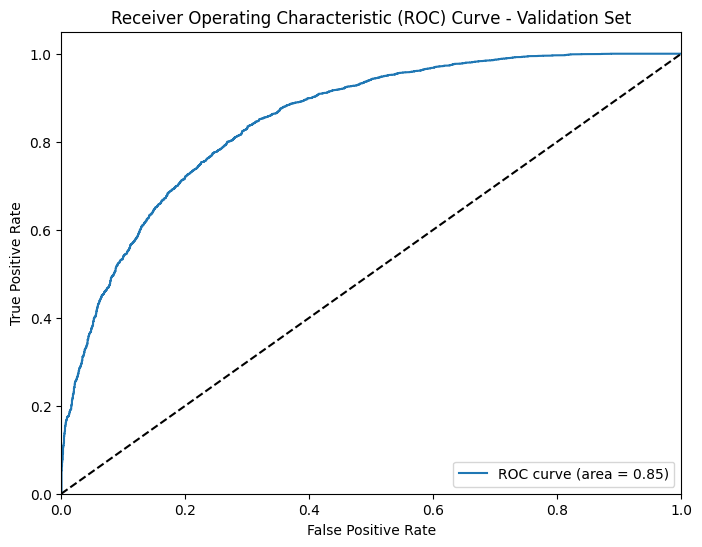

In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 정확도 계산
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# 혼동 행렬(confusion matrix) 계산
conf_matrix = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix:")
print(conf_matrix)

# 분류 보고서(classification report) 출력
class_report = classification_report(y_val, y_pred_val)
print("Classification Report:")
print(class_report)

# ROC 곡선 및 AUC 계산
y_pred_proba_val = pipeline.predict_proba(X_val)[:, 1]  # 양성 클래스에 대한 확률 추출
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_proba_val)
roc_auc_val = roc_auc_score(y_val, y_pred_proba_val)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], 'k--')  # 랜덤 모델의 ROC 곡선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc="lower right")

In [57]:
pipeline.fit(X_resampled, y_resampled)

predicted_label = pipeline.predict(X_test_tfidf)

test_df['label'] = predicted_label

test_df['label'].value_counts()

label
1    199793
0    110266
Name: count, dtype: int64

In [58]:
res_df = pd.concat([train_df, test_df])
res_df = res_df.reset_index(drop = True)

res_df.to_csv('./data/news_2016_긍정부정결과_BertTokenizer.csv', index = False)

In [59]:
res_df

,party_content,party_name,label
0,[이데일리 더불어 기자]與 서울 마포갑 강승규 탈락…안대희 공천확정더불어 (skze...,더불어민주당,0
1,야권연대가 사실상 실현 불가능해진 상황에서 국민의당을 공격해 제3당의 존재감...,국민의당,1
2,새누리당 색인 빨간색 천만 걸렸다,새누리당,0
3,다만 제18대 국회의원으로서 이 지역에서 기반을 다져온 무소속 전 의원이 안...,무소속,1
4,의 4·13 총선 후보자 공천 작업이 사실상 마무리됐다,민주당,0
...,...,...,...
344505,"청주상당(더불어), 청주서원(오제세), 청주흥덕(도종환), 청주청원(변재일) 지역...",더불어민주당,0
344506,"청주상당(), 청주서원(오제세), 청주흥덕(도종환), 청주청원(변재일) 지역 후보...",민주당,0
344507,"용산(진영) 동작갑(김병기) 영등포갑을(김영주, 신경민) 강서갑을병(금태섭, 더불...",더불어민주당,1
344508,"용산(진영) 동작갑(김병기) 영등포갑을(김영주, 신경민) 강서갑을병(금태섭, , ...",민주당,1
